# Assignment 3 - basic classifiers

Math practice and coding application for main classifiers introduced in Chapter 3 of the Python machine learning book. 

## Weighting

Note that this assignment is more difficult than the previous ones, and thus has a higher weighting 3 and longer duration (3 weeks). Each one of the previous two assignments has a weighting 1.

Specifically, the first 3 assignments contribute to your continuous assessment as follows:

Assignment weights: $w_1 = 1, w_2 = 1, w_3 = 3$

Assignment grades: $g_1, g_2, g_3$

Weighted average: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$

Future assignments will be added analogously.

# RBF kernel (20 points)

Show that a Gaussian RBF kernel can be expressed as a dot product:
$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= \phi(\mathbf{x})^T \phi(\mathbf{y})
$$
by spelling out the mapping function $\phi$.

For simplicity
* you can assume both $\mathbf{x}$ and $\mathbf{y}$ are 2D vectors
$
x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
, \;
y =
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$
* we use a scalar unit variance here

even though the proof can be extended for vectors $\mathbf{x}$ $\mathbf{y}$ and general covariance matrices.

Hint: use Taylor series expansion of the exponential function

$K(\mathbf{x}, \mathbf{y}) = e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} = e^{-\frac{||\mathbf{x}||^2}{2}} \times e^{-\frac{||\mathbf{y}||^2}{2}} \times e^{{x}^T {y}} = e^{-\frac{||\mathbf{x}||^2}{2}} \times e^{-\frac{||\mathbf{y}||^2}{2}} \times\sum\limits^{\infty}_{n=0}\frac{({x}^T {y})^n}{n!} = e^{-\frac{||\mathbf{x}||^2}{2}}\times e^{-\frac{||\mathbf{y}||^2}{2}}\times K_{poly}(x,y)$ 

$K_{poly}(x)$ corresponds to the following kernel function: 
$\phi^*(x) = [1, x_1, x_2, \frac{{x_1}^{2}}{\sqrt{2}}, \frac{{x_2}^{2}}{\sqrt{2}},x_1x_2, ...]$

$\phi(x) = e^{-\frac{||\mathbf{x}||^2}{2}} \times \phi^*(x)= e^{-\frac{||\mathbf{x}||^2}{2}} \times [1, x_1, x_2, \frac{{x_1}^{2}}{\sqrt{2}}, \frac{{x_2}^{2}}{\sqrt{2}},x_1x_2, ...]$

To be specific , $\phi^*(x) = \left((k!) (n-k)!\right)^{-0.5} x_1^k x_2^{n-k}$, where $ k \in [0, n], n \in [0, \infty]$

# Kernel SVM complexity (10 points)

How would the complexity (in terms of number of parameters) of a trained kernel SVM change with the amount of training data, and why?
Note that the answer may depend on the specific kernel used as well as the amount of training data.
Consider specifically the following types of kernels $K(\mathbf{x}, \mathbf{y})$.
* linear:
$$
K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}
$$
* polynomial with degree $q$:
$$
K\left(\mathbf{x}, \mathbf{y}\right) =
(\mathbf{x}^T\mathbf{y} + 1)^q
$$
* RBF with distance function $D$:
$$
K\left(\mathbf{x}, \mathbf{y} \right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}
$$


Let n be the training data and d be the dimension of x.

For linear kernel, the complexity is is O(nd). The complexity will become larger linearly with the increase of amount of training data.

For polynomial kernel with degree  q , the complexity is is O($nd^q$). The complexity will become larger linearly with the increase of amount of training data.

For RBF with distance function  D kernel, the complexity is shown to be infinity by expressing the kernel as a dot product. The complexity will remain infinity with the change of amount of training data.

# Gaussian density Bayes (30 points)

$$
p\left(\Theta | \mathbf{X}\right)
= 
\frac{p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)}{p\left(\mathbf{X}\right)}
$$

Assume both the likelihood and prior have Gaussian distributions:

$$
\begin{align}
p(\mathbf{X} | \Theta)
&=
\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\\
p(\Theta)
&=
\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\end{align}
$$

Derive $\Theta$ from the dataset $\mathbf{X}$ via the following methods:

### ML (maximum likelihood) estimation 
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
$$

### MAP estimation
$$
\begin{align}
\Theta_{MAP} 
&= 
argmax_{\Theta} p(\Theta | \mathbf{X})
\\
&=
argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)
\end{align}
$$

### Bayes estimation

$$
\begin{align}
\Theta_{Bayes} 
&= 
E(\Theta | \mathbf{X})
\\
&= 
\int \Theta p(\Theta | \mathbf{X}) d\Theta
\end{align}
$$

### ML (maximum likelihood) estimation


$p(\mathbf{X} | \Theta )\propto \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)$


To maximize $p(\mathbf{X} | \Theta ) \Leftrightarrow$ maximize $-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\Leftrightarrow$ minimize $\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2$

$\frac{\partial}{\partial \Theta}\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2=0 \Leftrightarrow \Theta = \bar{x}$

### MAP estimation

$p(\mathbf{X}| \Theta) p(\Theta) \propto \exp\left(-\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}+\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)\right)$


To maximize $p(\mathbf{X}| \Theta) p(\Theta) \Leftrightarrow$ maximize $-\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}+\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)\Leftrightarrow$ minimize $\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}+\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}$

$\frac{\partial}{\partial \Theta}\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}+\frac{(\Theta - \mu_0)^2}{2\sigma_0^2}\right)=0 \Leftrightarrow \Theta = \frac{\frac{\mu_0}{\sigma_0^2}+\frac{N\bar{x}}{\sigma^2}}{\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}}$

### Bayes estimation


Since $\sigma,\sigma_0,\mathbf{x}$ are fixed,


$$
\begin{align}
p(\Theta | \mathbf{X}) 
&
\propto p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)
\\
&=
\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \times \frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\\
&\propto 
\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \times \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\\
&=
\exp\left(-\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2} + \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\\
&=
\exp\left(-\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \bar{x} + \bar{x} - \Theta)^2}{2\sigma^2} + \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\\
&=
\exp\left(-\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \bar{x})^2 + N(\bar{x} - \Theta)^2  + 2(\bar{x} - \Theta)\sum_{t=1}^N (\mathbf{x}^{(t)} - \bar{x})}{2\sigma^2}+ \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\\
&=
\exp\left(-\left(\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \bar{x})^2 + N(\bar{x} - \Theta)^2 }{2\sigma^2}+ \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\\
&=
\exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \bar{x})^2}{2\sigma^2}\right) \times \exp\left(-\left(\frac{N(\bar{x} - \Theta)^2 }{2\sigma^2}+ \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\\
&\propto
\exp\left(-\left(\frac{N(\bar{x} - \Theta)^2 }{2\sigma^2}+ \frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)\right)
\\
&=
\exp\left(-\left(\theta^2(\frac{N}{2\sigma^2}+\frac{1}{2\sigma_0^2})-\theta(\frac{N\bar{x}}{\sigma^2}+\frac{\mu_0}{\sigma_0^2})+\frac{N\bar{x}^2}{2\sigma^2}+\frac{\mu_0^2}{2\sigma_0^2}\right)\right)
\\
&=
\exp\left(-\frac{1}{2}\left(\theta^2(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2})-2\theta(\frac{N\bar{x}}{\sigma^2}+\frac{\mu_0}{\sigma_0^2})+\frac{N\bar{x}^2}{\sigma^2}+\frac{\mu_0^2}{\sigma_0^2}\right)\right)
\\
&\propto
\exp\left(-\frac{1}{2}\left(\theta^2(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2})-2\theta(\frac{N\bar{x}}{\sigma^2}+\frac{\mu_0}{\sigma_0^2})\right)\right)
\\
&\propto
\exp\left(-\frac{(\theta-\mu_0^*)^2}{2{\sigma^*}^2}\right)
\\
&
where \space \mu_0^* = \frac{\frac{\mu_0}{\sigma_0^2}+\frac{N\bar{x}}{\sigma^2}}{\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}},\space {\sigma^*}^2=\frac{1}{\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}}
\end{align}
$$

According to the $p(\Theta | \mathbf{X})$, we can infer that  $\Theta | \mathbf{X}$ is a Normal distribution.
Therefore, $\Theta_{Bayes} =E(\Theta | \mathbf{X}) = \mu_0^* = \frac{\frac{\mu_0}{\sigma_0^2}+\frac{N\bar{x}}{\sigma^2}}{\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}}$


# Hand-written digit classification (40 points)

In the textbook sample code we applied different scikit-learn classifers for the Iris data set.

In this exercise, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN
* naive Bayes

The dataset is available as part of scikit learn, as follows.

## Load data

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

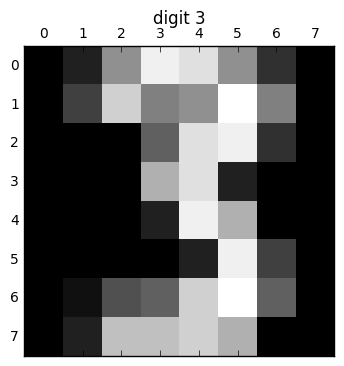

In [13]:
%matplotlib inline
import pylab as pl

index = 13
pl.gray()
pl.matshow(digits.images[index])
pl.title('digit ' + str(digits.target[index]))
pl.show()

## Date Preprocessing
Hint: How you divide training and test data set? And apply other techinques we have learned if needed.
You could take a look at the Iris data set case in the textbook.

In [14]:
#Your code comes here
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Classifier #1 Perceptron

In [15]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
_ = ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


## Classifier #2 Logistic Regression

In [16]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1000, random_state = 0)
_ = lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.94


## Classifier #3 SVM

In [17]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
_ = svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.97


## Classifier #4 Decision Tree

In [18]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, random_state = 0)
_ = tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.82


## Classifer #5 Random Forest

In [19]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

forest =RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0, n_jobs=2)
_ = forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.97


## Classifier #6 KNN

In [20]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.97


## Classifier #7 Naive Bayes

In [21]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
_ = gnb.fit(X_train_std, y_train)
y_pred = gnb.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.77


Among the classifiers, SVM, Random Forest, KNN perform the best and Naive Bayes perform the worst.
 
For SVM, it maximizes margins to nearest samples and is more robust against outliers.
 
For Random Forest, it is somehow a kind of ensemble of decision tree. It combines weak learners to build a more robust model and thus has a better generalization error and is less susceptible to overfitting.
 
For KNN, it deterimines the class label of a new data point by a majority vote among its k nearest neighbours.

However, for Naive Bayes, it assumes the features are independent for the likelihood, which might not be true in practice.